In [1]:
import matplotlib.pyplot as plt
import numpy as np

from thermohl import solver
from thermohl.solver import HeatEquationType
from thermohl.solver.enums.variable_type import VariableType
from thermohl.solver.enums.power_type import PowerType

This function plots the conductor temperature and ampacity during a day.
We use the `1t` solver, with IEEE power terms.
We can observe that when the solar heating increases, the conductor temperature increases also, but the the conductor ampacity decreases.

In [2]:
def example_solver1t(dic):
    # create solver with ieee power terms and 1t heat equation; other options
    # available are solver.cigre, solver.olla and solver.rte for power terms
    slvr = solver.ieee(dic, heat_equation=HeatEquationType.WITH_ONE_TEMPERATURE)

    # compute temperature
    dtemp = slvr.steady_temperature()

    # compute max intensity
    Trep = 55.0
    damp = slvr.steady_intensity(Trep)

    # plot results
    fig, ax = plt.subplots(nrows=3, ncols=1)
    ax[0].plot(
        slvr.args.hour,
        dtemp[VariableType.TEMPERATURE],
        c="C0",
        label="Conductor temperature (C)",
    )
    ax[0].axhline(Trep, ls="--", c="C1", label="Maximum temperature for ampacity")
    ax[1].plot(slvr.args.hour, dic[VariableType.TRANSIT], c="C0", label="Transit (A)")
    ax[1].plot(
        slvr.args.hour,
        damp[VariableType.TRANSIT],
        c="C1",
        label="Conductor ampacity (A)",
    )
    ax[2].plot(
        slvr.args.hour, dtemp[PowerType.SOLAR], label="Solar heating power (W/m)"
    )
    for i in range(3):
        ax[i].grid(True)
        ax[i].legend()
    ax[2].set_xlabel("Hour")
    %matplotlib inline
    plt.show()

In [3]:
import matplotlib

matplotlib.use("TkAgg")
plt.close("all")

# Generate input dict (for the sake of simplicity, only a few inputs are
# used, the rest is filled with default values).
dic = {
    "latitude": 46.1,
    "altitude": 123.0,
    "azimuth": 31.0,
    "month": 6,
    "day": 20,
    "hour": np.linspace(0.0, 23.0, 24),
    VariableType.TRANSIT: np.array([400.0 for i in range(12)] + [700.0 for i in range(12)]),
}

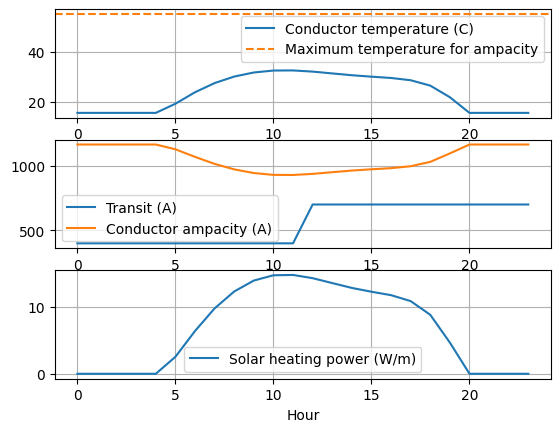

invalid command name "138549228896448process_stream_events"
    while executing
"138549228896448process_stream_events"
    ("after" script)


In [4]:
example_solver1t(dic)